[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-9a37217d3f37>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=labels, palette="viridis")


📊 Ranked Resumes by Match Score with Highlighted Keywords:

1. Resume 3 - Score: 0.60
   ➤ AI engineer with experience in NLP, Python, and TensorFlow.
   🔍 Common Keywords: python, nlp, tensorflow, ai, engineer
--------------------------------------------------------------------------------
2. Resume 1 - Score: 0.40
   ➤ Experienced data scientist with Python, machine learning, and deep learning skills.
   🔍 Common Keywords: skills, learning, machine, python
--------------------------------------------------------------------------------
3. Resume 2 - Score: 0.00
   ➤ Frontend developer skilled in HTML, CSS, JavaScript, and React.
   🔍 Common Keywords: None
--------------------------------------------------------------------------------
4. Resume 4 - Score: 0.00
   ➤ Java backend developer with Spring Boot and microservices experience.
   🔍 Common Keywords: None
--------------------------------------------------------------------------------


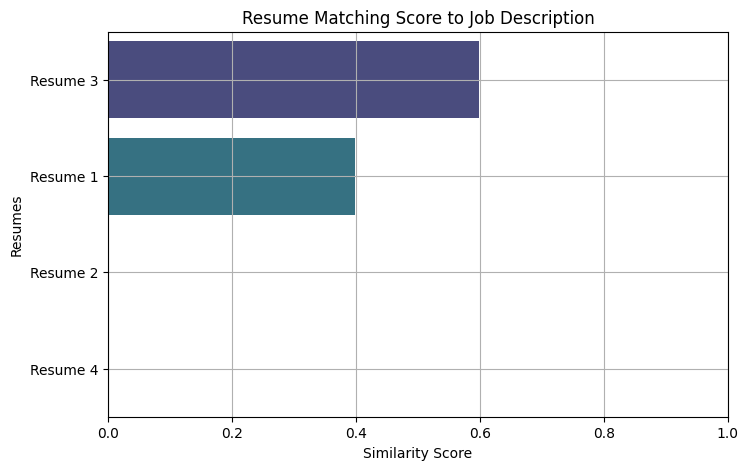

In [1]:
# 🔹 Enhanced AI Resume Screener with Highlights and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
from nltk.corpus import stopwords

# 🔹 Sample resumes
resumes = [
    "Experienced data scientist with Python, machine learning, and deep learning skills.",
    "Frontend developer skilled in HTML, CSS, JavaScript, and React.",
    "AI engineer with experience in NLP, Python, and TensorFlow.",
    "Java backend developer with Spring Boot and microservices experience."
]

# 🔹 Job Description
job_description = "Looking for an AI engineer with strong Python, machine learning, NLP and TensorFlow skills."

# 🔹 Text Preprocessing Function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    filtered = [w for w in words if w not in stop_words]
    return " ".join(filtered)

# 🔹 Apply Preprocessing
preprocessed_resumes = [preprocess(r) for r in resumes]
preprocessed_job = preprocess(job_description)

# 🔹 TF-IDF Vectorization
documents = preprocessed_resumes + [preprocessed_job]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(documents)

# 🔹 Similarity Calculation
resume_vectors = vectors[:-1]
job_vector = vectors[-1]
similarity_scores = cosine_similarity(resume_vectors, job_vector)

# 🔹 Rank Resumes
ranked = sorted([(i, score[0]) for i, score in enumerate(similarity_scores)], key=lambda x: x[1], reverse=True)

# 🔹 Print Ranked Resumes with Keyword Overlap
print("📊 Ranked Resumes by Match Score with Highlighted Keywords:\n")
for rank, (index, score) in enumerate(ranked, 1):
    print(f"{rank}. Resume {index+1} - Score: {score:.2f}")
    print(f"   ➤ {resumes[index]}")

    # Highlight common words
    resume_words = set(preprocessed_resumes[index].split())
    job_words = set(preprocessed_job.split())
    common = resume_words.intersection(job_words)

    print(f"   🔍 Common Keywords: {', '.join(common) if common else 'None'}")
    print("-" * 80)

# 🔹 Visualization
scores = [s[1] for s in ranked]
labels = [f"Resume {s[0]+1}" for s in ranked]

plt.figure(figsize=(8, 5))
sns.barplot(x=scores, y=labels, palette="viridis")
plt.title("Resume Matching Score to Job Description")
plt.xlabel("Similarity Score")
plt.ylabel("Resumes")
plt.xlim(0, 1)
plt.grid(True)
plt.show()